In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from keras.models import Sequential
from keras.layers import InputLayer, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, BatchNormalization
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.constraints import MaxNorm
from keras.callbacks import ModelCheckpoint

import time

In [26]:
filepath = 'C:/Users/ss230/Documents/Study/NSIDC/Edited Data/N_Sea_Ice_Index_Regional_Monthly_Data_G02135_v3.0.xlsx'
Bering = pd.read_excel(filepath, sheet_name='Bering-Extent-km^2')

In [27]:
import sys
sys.path.append('C:/Users/ss230/Documents/Study/NSIDC/NH/')
import Function as fp

In [28]:
fp.month_mapping(Bering)
fp.date_time(Bering)

,Extent,Date
0,320266.650,1979-01-01
1,541778.338,1979-02-01
2,638262.988,1979-03-01
3,423025.159,1979-04-01
4,215587.216,1979-05-01
...,...,...
488,317377.493,2023-05-01
489,39601.476,2023-06-01
490,16935.702,2023-07-01
491,1305.744,2023-09-01


In [29]:
scaler = MinMaxScaler()
Bering['Extent'] = scaler.fit_transform(Bering['Extent'].values.reshape(-1, 1))

In [30]:
def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    lead_time = 2
    for i in range(len(df_as_np) - window_size - lead_time + 1):
        window_data = df_as_np[i:i+window_size]
        row = [[a] for a in window_data]
        X.append(row)
        label = df_as_np[i+window_size+lead_time-1]  # Adjusted for lead time
        y.append(label)
    return np.array(X), np.array(y)

In [31]:
extent = Bering['Extent']
W_S=12
X,y = df_to_X_y(extent, W_S)
X.shape, y.shape

((480, 12, 1), (480,))

In [32]:
X_train, y_train = X[:384], y[:384]
X_val, y_val = X[384:432], y[384:432]
X_test, y_test = X[432:], y[432:]

In [33]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(W_S, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(32, kernel_constraint=MaxNorm(1.0), activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))

In [34]:
cp = ModelCheckpoint('Bering_model_LT2/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(0.0001), metrics=[RootMeanSquaredError()])

In [35]:
stime = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=8, callbacks=[cp])
etime = time.time()

Epoch 1/50
42/48 [=========================>....] - ETA: 0s - loss: 0.2033 - root_mean_squared_error: 0.4509

INFO:tensorflow:Assets written to: Bering_model_LT2\assets


INFO:tensorflow:Assets written to: Bering_model_LT2\assets


48/48 [==============================] - 5s 79ms/step - loss: 0.1943 - root_mean_squared_error: 0.4408 - val_loss: 0.0660 - val_root_mean_squared_error: 0.2568
Epoch 2/50
41/48 [========================>.....] - ETA: 0s - loss: 0.1094 - root_mean_squared_error: 0.3308

INFO:tensorflow:Assets written to: Bering_model_LT2\assets


INFO:tensorflow:Assets written to: Bering_model_LT2\assets


48/48 [==============================] - 3s 62ms/step - loss: 0.1103 - root_mean_squared_error: 0.3321 - val_loss: 0.0561 - val_root_mean_squared_error: 0.2369
Epoch 3/50
41/48 [========================>.....] - ETA: 0s - loss: 0.0818 - root_mean_squared_error: 0.2859

INFO:tensorflow:Assets written to: Bering_model_LT2\assets


INFO:tensorflow:Assets written to: Bering_model_LT2\assets


48/48 [==============================] - 4s 77ms/step - loss: 0.0824 - root_mean_squared_error: 0.2871 - val_loss: 0.0470 - val_root_mean_squared_error: 0.2168
Epoch 4/50
41/48 [========================>.....] - ETA: 0s - loss: 0.0676 - root_mean_squared_error: 0.2600

INFO:tensorflow:Assets written to: Bering_model_LT2\assets


INFO:tensorflow:Assets written to: Bering_model_LT2\assets


48/48 [==============================] - 3s 65ms/step - loss: 0.0658 - root_mean_squared_error: 0.2566 - val_loss: 0.0401 - val_root_mean_squared_error: 0.2004
Epoch 5/50
46/48 [===========================>..] - ETA: 0s - loss: 0.0497 - root_mean_squared_error: 0.2229

INFO:tensorflow:Assets written to: Bering_model_LT2\assets


INFO:tensorflow:Assets written to: Bering_model_LT2\assets


48/48 [==============================] - 3s 69ms/step - loss: 0.0484 - root_mean_squared_error: 0.2201 - val_loss: 0.0356 - val_root_mean_squared_error: 0.1886
Epoch 6/50
40/48 [========================>.....] - ETA: 0s - loss: 0.0406 - root_mean_squared_error: 0.2016

INFO:tensorflow:Assets written to: Bering_model_LT2\assets


INFO:tensorflow:Assets written to: Bering_model_LT2\assets


48/48 [==============================] - 3s 72ms/step - loss: 0.0426 - root_mean_squared_error: 0.2065 - val_loss: 0.0326 - val_root_mean_squared_error: 0.1806
Epoch 7/50
46/48 [===========================>..] - ETA: 0s - loss: 0.0366 - root_mean_squared_error: 0.1914

INFO:tensorflow:Assets written to: Bering_model_LT2\assets


INFO:tensorflow:Assets written to: Bering_model_LT2\assets


48/48 [==============================] - 3s 73ms/step - loss: 0.0372 - root_mean_squared_error: 0.1928 - val_loss: 0.0308 - val_root_mean_squared_error: 0.1754
Epoch 8/50
32/48 [===================>..........] - ETA: 0s - loss: 0.0299 - root_mean_squared_error: 0.1729

INFO:tensorflow:Assets written to: Bering_model_LT2\assets


INFO:tensorflow:Assets written to: Bering_model_LT2\assets


48/48 [==============================] - 3s 72ms/step - loss: 0.0305 - root_mean_squared_error: 0.1745 - val_loss: 0.0292 - val_root_mean_squared_error: 0.1710
Epoch 9/50
40/48 [========================>.....] - ETA: 0s - loss: 0.0297 - root_mean_squared_error: 0.1722

INFO:tensorflow:Assets written to: Bering_model_LT2\assets


INFO:tensorflow:Assets written to: Bering_model_LT2\assets


48/48 [==============================] - 3s 73ms/step - loss: 0.0279 - root_mean_squared_error: 0.1671 - val_loss: 0.0283 - val_root_mean_squared_error: 0.1681
Epoch 10/50
43/48 [=========================>....] - ETA: 0s - loss: 0.0256 - root_mean_squared_error: 0.1600

INFO:tensorflow:Assets written to: Bering_model_LT2\assets


INFO:tensorflow:Assets written to: Bering_model_LT2\assets


48/48 [==============================] - 3s 59ms/step - loss: 0.0242 - root_mean_squared_error: 0.1555 - val_loss: 0.0272 - val_root_mean_squared_error: 0.1648
Epoch 11/50
40/48 [========================>.....] - ETA: 0s - loss: 0.0216 - root_mean_squared_error: 0.1470

INFO:tensorflow:Assets written to: Bering_model_LT2\assets


INFO:tensorflow:Assets written to: Bering_model_LT2\assets


48/48 [==============================] - 3s 57ms/step - loss: 0.0216 - root_mean_squared_error: 0.1471 - val_loss: 0.0260 - val_root_mean_squared_error: 0.1611
Epoch 12/50
34/48 [====================>.........] - ETA: 0s - loss: 0.0224 - root_mean_squared_error: 0.1495

INFO:tensorflow:Assets written to: Bering_model_LT2\assets


INFO:tensorflow:Assets written to: Bering_model_LT2\assets


48/48 [==============================] - 3s 69ms/step - loss: 0.0228 - root_mean_squared_error: 0.1509 - val_loss: 0.0256 - val_root_mean_squared_error: 0.1599
Epoch 13/50
48/48 [==============================] - 0s 5ms/step - loss: 0.0203 - root_mean_squared_error: 0.1426 - val_loss: 0.0257 - val_root_mean_squared_error: 0.1603
Epoch 14/50
48/48 [==============================] - ETA: 0s - loss: 0.0185 - root_mean_squared_error: 0.1362

INFO:tensorflow:Assets written to: Bering_model_LT2\assets


INFO:tensorflow:Assets written to: Bering_model_LT2\assets


48/48 [==============================] - 3s 62ms/step - loss: 0.0185 - root_mean_squared_error: 0.1362 - val_loss: 0.0254 - val_root_mean_squared_error: 0.1593
Epoch 15/50
39/48 [=======================>......] - ETA: 0s - loss: 0.0169 - root_mean_squared_error: 0.1301

INFO:tensorflow:Assets written to: Bering_model_LT2\assets


INFO:tensorflow:Assets written to: Bering_model_LT2\assets


48/48 [==============================] - 3s 69ms/step - loss: 0.0173 - root_mean_squared_error: 0.1316 - val_loss: 0.0224 - val_root_mean_squared_error: 0.1497
Epoch 16/50
48/48 [==============================] - 0s 5ms/step - loss: 0.0161 - root_mean_squared_error: 0.1270 - val_loss: 0.0228 - val_root_mean_squared_error: 0.1511
Epoch 17/50
48/48 [==============================] - 0s 5ms/step - loss: 0.0159 - root_mean_squared_error: 0.1263 - val_loss: 0.0248 - val_root_mean_squared_error: 0.1574
Epoch 18/50
35/48 [====================>.........] - ETA: 0s - loss: 0.0140 - root_mean_squared_error: 0.1182

INFO:tensorflow:Assets written to: Bering_model_LT2\assets


INFO:tensorflow:Assets written to: Bering_model_LT2\assets


48/48 [==============================] - 3s 71ms/step - loss: 0.0142 - root_mean_squared_error: 0.1191 - val_loss: 0.0196 - val_root_mean_squared_error: 0.1401
Epoch 19/50
48/48 [==============================] - 0s 5ms/step - loss: 0.0199 - root_mean_squared_error: 0.1409 - val_loss: 0.0269 - val_root_mean_squared_error: 0.1642
Epoch 20/50
48/48 [==============================] - 0s 5ms/step - loss: 0.0156 - root_mean_squared_error: 0.1247 - val_loss: 0.0287 - val_root_mean_squared_error: 0.1693
Epoch 21/50
48/48 [==============================] - 0s 5ms/step - loss: 0.0183 - root_mean_squared_error: 0.1352 - val_loss: 0.0268 - val_root_mean_squared_error: 0.1637
Epoch 22/50
48/48 [==============================] - 0s 5ms/step - loss: 0.0188 - root_mean_squared_error: 0.1370 - val_loss: 0.0281 - val_root_mean_squared_error: 0.1678
Epoch 23/50
48/48 [==============================] - 0s 4ms/step - loss: 0.0184 - root_mean_squared_error: 0.1356 - val_loss: 0.0262 - val_root_mean_squared

INFO:tensorflow:Assets written to: Bering_model_LT2\assets


INFO:tensorflow:Assets written to: Bering_model_LT2\assets


48/48 [==============================] - 3s 71ms/step - loss: 0.0148 - root_mean_squared_error: 0.1218 - val_loss: 0.0174 - val_root_mean_squared_error: 0.1319
Epoch 33/50
48/48 [==============================] - 0s 6ms/step - loss: 0.0206 - root_mean_squared_error: 0.1437 - val_loss: 0.0227 - val_root_mean_squared_error: 0.1506
Epoch 34/50
48/48 [==============================] - 0s 5ms/step - loss: 0.0164 - root_mean_squared_error: 0.1282 - val_loss: 0.0187 - val_root_mean_squared_error: 0.1368
Epoch 35/50
48/48 [==============================] - 0s 6ms/step - loss: 0.0186 - root_mean_squared_error: 0.1362 - val_loss: 0.0184 - val_root_mean_squared_error: 0.1355
Epoch 36/50
33/48 [===================>..........] - ETA: 0s - loss: 0.0182 - root_mean_squared_error: 0.1348

INFO:tensorflow:Assets written to: Bering_model_LT2\assets


INFO:tensorflow:Assets written to: Bering_model_LT2\assets


48/48 [==============================] - 3s 54ms/step - loss: 0.0169 - root_mean_squared_error: 0.1298 - val_loss: 0.0169 - val_root_mean_squared_error: 0.1300
Epoch 37/50
48/48 [==============================] - 0s 5ms/step - loss: 0.0162 - root_mean_squared_error: 0.1272 - val_loss: 0.0250 - val_root_mean_squared_error: 0.1582
Epoch 38/50
48/48 [==============================] - 0s 5ms/step - loss: 0.0179 - root_mean_squared_error: 0.1338 - val_loss: 0.0203 - val_root_mean_squared_error: 0.1425
Epoch 39/50
48/48 [==============================] - 0s 4ms/step - loss: 0.0175 - root_mean_squared_error: 0.1324 - val_loss: 0.0231 - val_root_mean_squared_error: 0.1520
Epoch 40/50
48/48 [==============================] - 0s 4ms/step - loss: 0.0172 - root_mean_squared_error: 0.1311 - val_loss: 0.0194 - val_root_mean_squared_error: 0.1395
Epoch 41/50
48/48 [==============================] - 0s 4ms/step - loss: 0.0196 - root_mean_squared_error: 0.1401 - val_loss: 0.0180 - val_root_mean_squared

INFO:tensorflow:Assets written to: Bering_model_LT2\assets


INFO:tensorflow:Assets written to: Bering_model_LT2\assets


48/48 [==============================] - 3s 74ms/step - loss: 0.0164 - root_mean_squared_error: 0.1282 - val_loss: 0.0166 - val_root_mean_squared_error: 0.1288
Epoch 49/50
48/48 [==============================] - 0s 5ms/step - loss: 0.0162 - root_mean_squared_error: 0.1273 - val_loss: 0.0171 - val_root_mean_squared_error: 0.1309
Epoch 50/50
48/48 [==============================] - 0s 5ms/step - loss: 0.0152 - root_mean_squared_error: 0.1234 - val_loss: 0.0201 - val_root_mean_squared_error: 0.1419


In [36]:
time = (etime - stime)/60
print(f'{time} minutes')

1.1139717737833659 minutes


In [37]:
loss = history.history['loss']
epochs = list(range(1, len(loss) + 1))

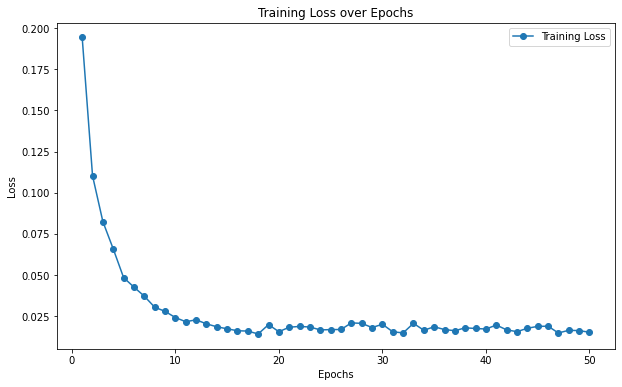

In [38]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training Loss', marker='o', linestyle='-')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

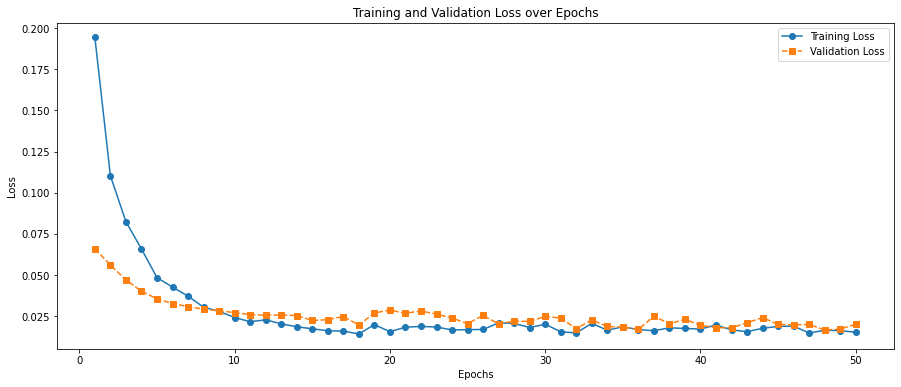

In [39]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(15,6))
plt.plot(epochs, training_loss, label='Training Loss', marker='o', linestyle='-')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='s', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

In [40]:
from tensorflow.keras.models import load_model
model1 = load_model('Bering_model_LT2/')

In [41]:
test_predictions = model1.predict(X_test)

2/2 [==============================] - 0s 1ms/step


In [42]:
mse = mean_squared_error(y_test, test_predictions)
print('RMSE :', np.sqrt(mse))

mae = mean_absolute_error(y_test, test_predictions)
print('MAE :', mae)

RMSE : 0.0755100301315584
MAE : 0.05868014549483456


In [43]:
test_predictions = scaler.inverse_transform(test_predictions)
test_original = scaler.inverse_transform(y_test.reshape(-1,1))

In [44]:
train_results = pd.DataFrame(data={'Train Predictions': test_predictions.flatten(), 'Actual Extent': test_original.flatten()})
train_results

,Train Predictions,Actual Extent
0,31010.480469,32185.203
1,-19661.599609,2490.551
2,12652.506836,1707.377
3,59206.152344,11293.282
4,228724.531250,49957.406
5,311352.156250,151973.751
6,479334.031250,466524.938
7,536886.000000,708542.184
8,580776.312500,652598.000
9,554905.000000,414216.785


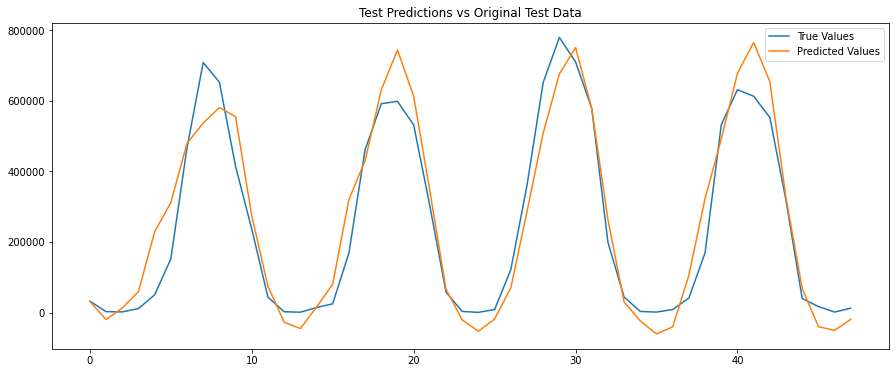

In [45]:
plt.figure(figsize=(15,6))
plt.plot(test_original, label='True Values')
plt.plot(test_predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()

In [46]:
predictions = model1.predict(X)

15/15 [==============================] - 0s 2ms/step


In [47]:
predictions = scaler.inverse_transform(predictions)
Original = scaler.inverse_transform(y.reshape(-1,1))

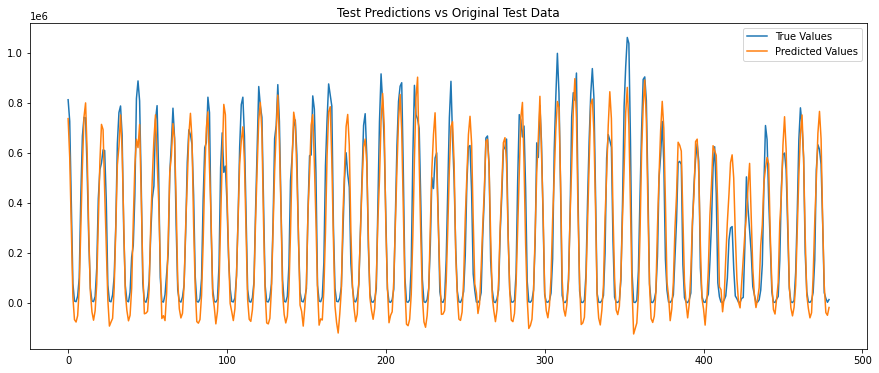

In [48]:
plt.figure(figsize=(15,6))
plt.plot(Original, label='True Values')
plt.plot(predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()